In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

# -------------------------------------
# Step 1: Define Data Transforms
# -------------------------------------
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

val_test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# -------------------------------------
# Step 2: Load Dataset
# -------------------------------------
dataset_dir = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data"

train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "train"), transform=train_transforms)
val_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "val"), transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "test"), transform=val_test_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# -------------------------------------
# Step 3: Define a Simple CNN Model
# -------------------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Input: 3 channels, Output: 16 channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Pooling layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 2)  # Output: 2 classes (ambulance, not_ambulance)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(self.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = x.view(-1, 32 * 16 * 16)  # Flatten
        x = self.relu(self.fc1(x))  # FC1 -> ReLU
        x = self.fc2(x)  # FC2 (output)
        return x

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in DataLoader(train_dataset, batch_size=32, shuffle=True):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Save the trained model
torch.save(model.state_dict(), "ambulance_classifier.pth")


# -------------------------------------
# Step 5: Evaluate the Model
# -------------------------------------
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/10], Loss: 0.1846
Epoch [2/10], Loss: 0.1149
Epoch [3/10], Loss: 0.0931
Epoch [4/10], Loss: 0.0755
Epoch [5/10], Loss: 0.0688
Epoch [6/10], Loss: 0.0591
Epoch [7/10], Loss: 0.0409
Epoch [8/10], Loss: 0.0327
Epoch [9/10], Loss: 0.0205
Epoch [10/10], Loss: 0.0155
Test Accuracy: 93.75%


In [2]:
from PIL import Image
import torch

# Load the image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data\test\ambulance\ambulance_31.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Preprocess the image
preprocess = val_test_transforms  # Use the same transforms as validation/test data
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Move the input tensor to the same device as the model
input_tensor = input_tensor.to(device)

# Make a prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(input_tensor)

# Interpret the output
_, predicted_class = torch.max(output, 1)

# Map the predicted class index to the class label
class_labels = train_dataset.classes  # Get class labels from the dataset
predicted_label = class_labels[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: ambulance


In [3]:
from PIL import Image
import torch

# Load the image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data\test\ambulance\ambulance_55.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Preprocess the image
preprocess = val_test_transforms  # Use the same transforms as validation/test data
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Move the input tensor to the same device as the model
input_tensor = input_tensor.to(device)

# Make a prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(input_tensor)

# Interpret the output
_, predicted_class = torch.max(output, 1)

# Map the predicted class index to the class label
class_labels = train_dataset.classes  # Get class labels from the dataset
predicted_label = class_labels[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: ambulance


In [4]:
from PIL import Image
import torch

# Load the image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data\test\not_ambulance\Image_000167.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Preprocess the image
preprocess = val_test_transforms  # Use the same transforms as validation/test data
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Move the input tensor to the same device as the model
input_tensor = input_tensor.to(device)

# Make a prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(input_tensor)

# Interpret the output
_, predicted_class = torch.max(output, 1)

# Map the predicted class index to the class label
class_labels = train_dataset.classes  # Get class labels from the dataset
predicted_label = class_labels[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: not_ambulance


In [5]:
from PIL import Image
import torch

# Load the image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\random vehicles dataset\Big Truck\Image_000002.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Preprocess the image
preprocess = val_test_transforms  # Use the same transforms as validation/test data
input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

# Move the input tensor to the same device as the model
input_tensor = input_tensor.to(device)

# Make a prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    output = model(input_tensor)

# Interpret the output
_, predicted_class = torch.max(output, 1)

# Map the predicted class index to the class label
class_labels = train_dataset.classes  # Get class labels from the dataset
predicted_label = class_labels[predicted_class.item()]

print(f"Predicted Label: {predicted_label}")

Predicted Label: not_ambulance



0: 448x640 2 persons, 5 cars, 3 buss, 71.5ms
Speed: 9.6ms preprocess, 71.5ms inference, 142.9ms postprocess per image at shape (1, 3, 448, 640)


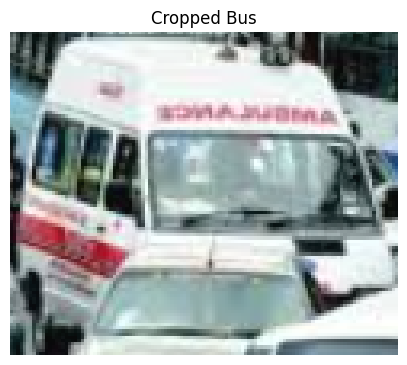

In [6]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # You can use yolov8s, yolov8m, etc.

# Load the image using PIL
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major Project\Images\ambulance in traffic\Screenshot 2025-02-12 131319.png"
image_pil = Image.open(image_path)

# Convert image to RGB (remove alpha channel if present)
image_rgb = image_pil.convert("RGB")

# Convert PIL image to NumPy array
image_np = np.array(image_rgb)

# Perform inference
results = model(image_np)

# Extract the bus bounding box
bus_class_id = 5  # COCO class ID for bus
bus_box = None

for result in results:
    boxes = result.boxes  # Get bounding boxes
    for box in boxes:
        class_id = box.cls.item()  # Get class ID
        if class_id == bus_class_id:  # Check if the class is bus
            bus_box = box.xyxy[0].tolist()  # Get bounding box coordinates [x1, y1, x2, y2]
            break

# Crop the bus from the image
if bus_box:
    x1, y1, x2, y2 = map(int, bus_box)  # Convert coordinates to integers
    bus_image = image_np[y1:y2, x1:x2]  # Crop the bus using NumPy array slicing

    # Save the cropped bus image
    bus_image_pil = Image.fromarray(bus_image)
    bus_image_pil.save("bus_cropped.jpg")

    # Display the cropped bus image
    plt.figure(figsize=(5, 5))
    plt.imshow(bus_image)
    plt.axis("off")
    plt.title("Cropped Bus")
    plt.show()
else:
    print("No bus detected in the image.")


0: 448x640 2 persons, 5 cars, 3 buss, 13.4ms
Speed: 3.5ms preprocess, 13.4ms inference, 2.9ms postprocess per image at shape (1, 3, 448, 640)


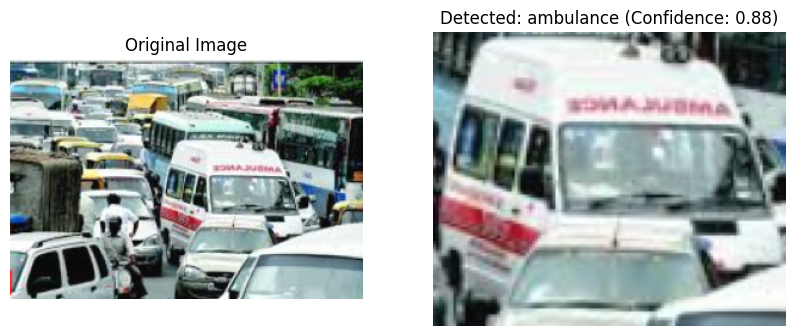

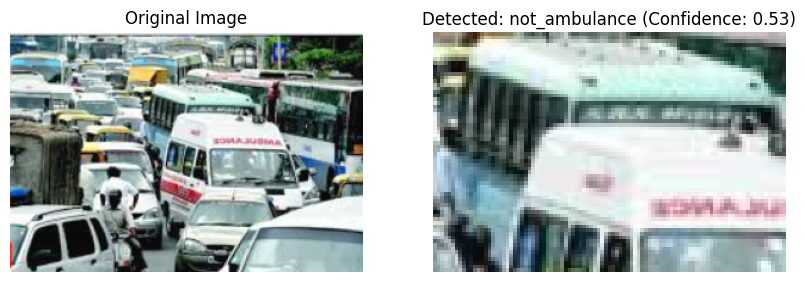

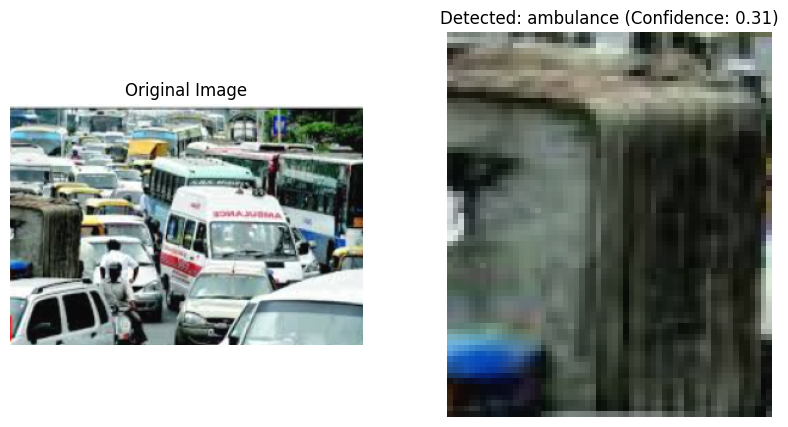

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from ultralytics import YOLO

# ==================================================================
# PART 1: CLASSIFICATION MODEL SETUP
# ==================================================================

# Define transforms and datasets
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_dir = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data"
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "train"), transform=train_transforms)

# Define and load classification model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("ambulance_classifier.pth"))  # Load trained weights
model.eval()

# ==================================================================
# PART 2: OBJECT DETECTION AND CLASSIFICATION
# ==================================================================

# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt")

# Load and process image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major Project\Images\ambulance in traffic\Screenshot 2025-02-12 131319.png"
image_pil = Image.open(image_path).convert("RGB")
image_np = np.array(image_pil)

# Detect vehicles that look like buses
results = yolo_model(image_np)

# Define relevant class IDs
bus_like_classes = [5, 7, 8, 9]  # bus, truck, fire truck, ambulance

# Process detections
detected_vehicles = []
for result in results:
    for box in result.boxes:
        class_id = int(box.cls.item())
        if class_id in bus_like_classes:  # Check if class is bus-like
            bbox = box.xyxy[0].tolist()  # Get bounding box
            confidence = box.conf.item()  # Get confidence score
            detected_vehicles.append((class_id, bbox, confidence))

# Classify detected vehicles
for class_id, bbox, confidence in detected_vehicles:
    x1, y1, x2, y2 = map(int, bbox)
    cropped_img = image_np[y1:y2, x1:x2]
    
    # Preprocess for classification
    input_tensor = val_test_transforms(Image.fromarray(cropped_img)).unsqueeze(0).to(device)
    
    # Classify
    with torch.no_grad():
        output = model(input_tensor)
    
    # Get prediction
    _, pred = torch.max(output, 1)
    class_label = train_dataset.classes[pred.item()]
    
    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img)
    plt.title(f"Detected: {class_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

if not detected_vehicles:
    print("No bus-like vehicles detected in the image.")


0: 416x640 5 persons, 9 cars, 2 motorcycles, 2 buss, 3 trucks, 61.3ms
Speed: 2.2ms preprocess, 61.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


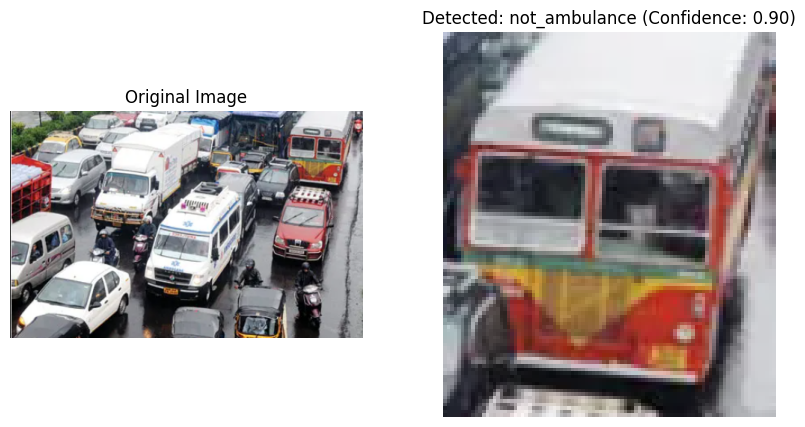

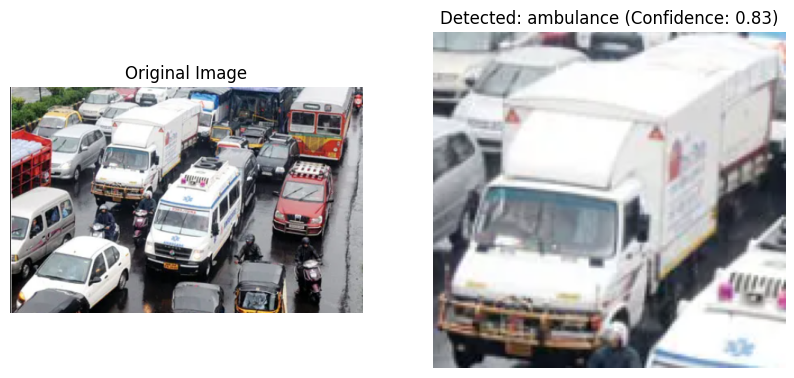

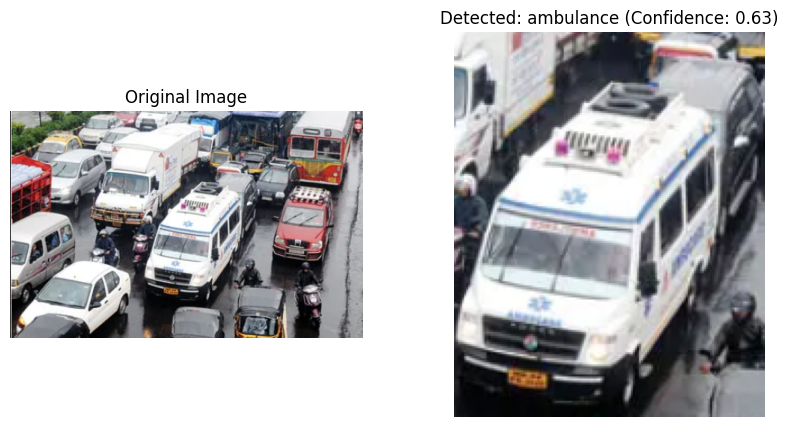

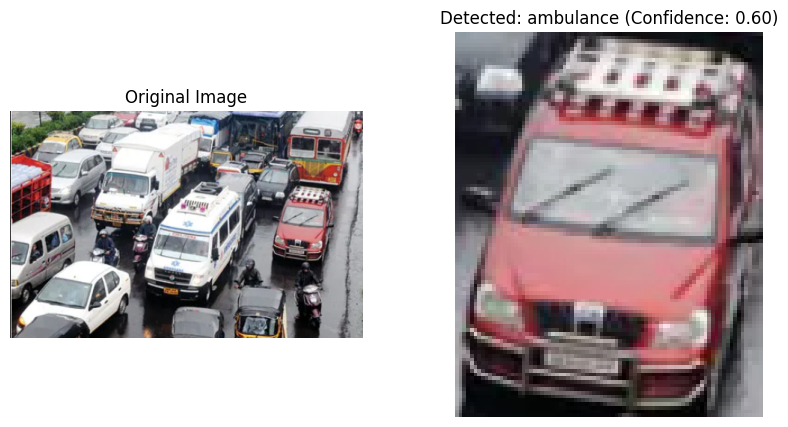

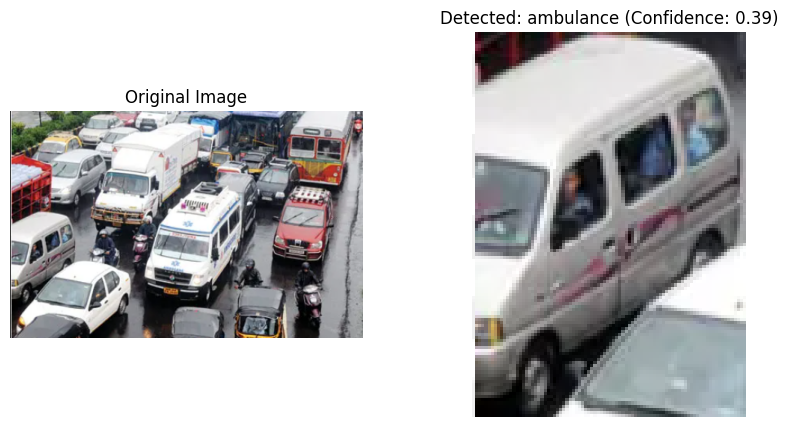

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from ultralytics import YOLO

# ==================================================================
# PART 1: CLASSIFICATION MODEL SETUP
# ==================================================================

# Define transforms and datasets
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_dir = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data"
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "train"), transform=train_transforms)

# Define and load classification model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("ambulance_classifier.pth"))  # Load trained weights
model.eval()

# ==================================================================
# PART 2: OBJECT DETECTION AND CLASSIFICATION
# ==================================================================

# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt")

# Load and process image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major Project\Images\ambulance in traffic\Screenshot 2025-02-18 223654.png"
image_pil = Image.open(image_path).convert("RGB")
image_np = np.array(image_pil)

# Detect vehicles that look like buses
results = yolo_model(image_np)

# Define relevant class IDs
bus_like_classes = [5, 7, 8, 9]  # bus, truck, fire truck, ambulance

# Process detections
detected_vehicles = []
for result in results:
    for box in result.boxes:
        class_id = int(box.cls.item())
        if class_id in bus_like_classes:  # Check if class is bus-like
            bbox = box.xyxy[0].tolist()  # Get bounding box
            confidence = box.conf.item()  # Get confidence score
            detected_vehicles.append((class_id, bbox, confidence))

# Classify detected vehicles
for class_id, bbox, confidence in detected_vehicles:
    x1, y1, x2, y2 = map(int, bbox)
    cropped_img = image_np[y1:y2, x1:x2]
    
    # Preprocess for classification
    input_tensor = val_test_transforms(Image.fromarray(cropped_img)).unsqueeze(0).to(device)
    
    # Classify
    with torch.no_grad():
        output = model(input_tensor)
    
    # Get prediction
    _, pred = torch.max(output, 1)
    class_label = train_dataset.classes[pred.item()]
    
    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img)
    plt.title(f"Detected: {class_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

if not detected_vehicles:
    print("No bus-like vehicles detected in the image.")


0: 480x640 2 cars, 5 buss, 4 trucks, 52.9ms
Speed: 4.6ms preprocess, 52.9ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


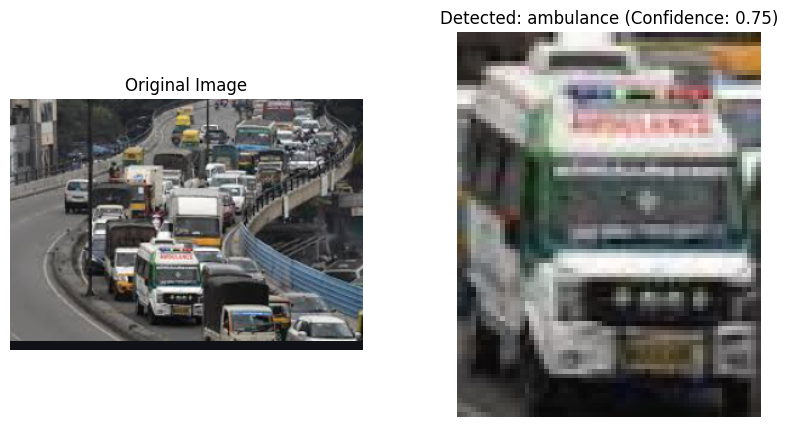

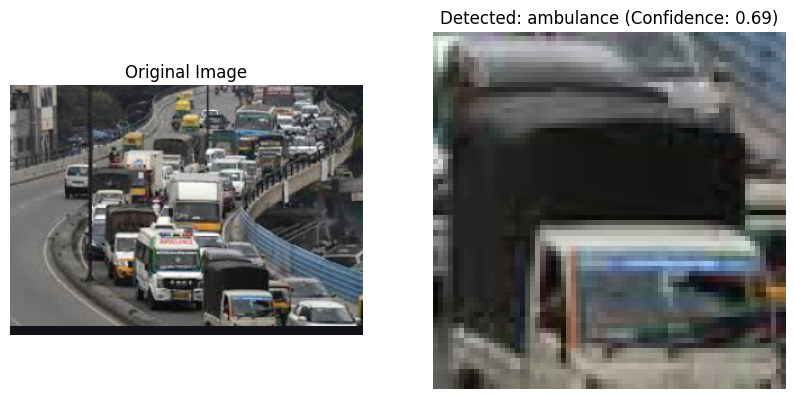

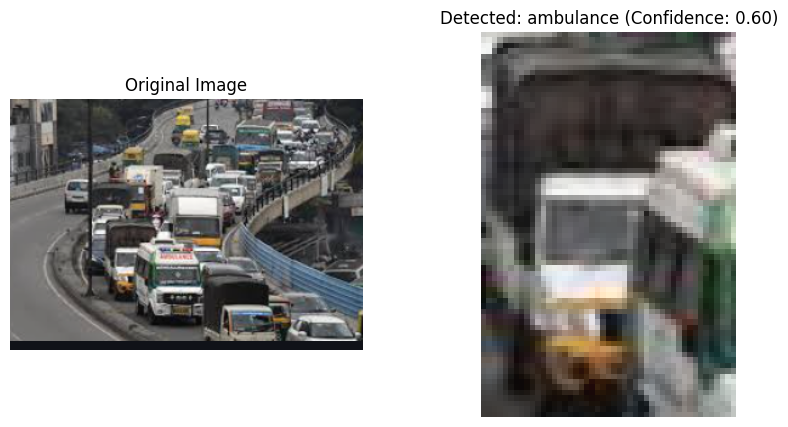

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from ultralytics import YOLO

# ==================================================================
# PART 1: CLASSIFICATION MODEL SETUP
# ==================================================================

# Define transforms and datasets
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_dir = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major_Project_2\ambulance\data"
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_dir, "train"), transform=train_transforms)

# Define and load classification model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("ambulance_classifier.pth"))  # Load trained weights
model.eval()

# ==================================================================
# PART 2: OBJECT DETECTION AND CLASSIFICATION
# ==================================================================

# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt")

# Load and process image
image_path = r"C:\Users\HP\Desktop\symbiosis\Sem 2\Courses\Computer Vision\Major Project\Images\ambulance in traffic\Screenshot 2025-02-12 131617.png"
image_pil = Image.open(image_path).convert("RGB")
image_np = np.array(image_pil)

# Detect vehicles that look like buses
results = yolo_model(image_np)

# Define relevant class IDs
bus_like_classes = [5, 7, 8, 9]  # bus, truck, fire truck, ambulance
confidence_threshold = 0.30  # Confidence threshold (50%)

# Process detections
detected_vehicles = []
for result in results:
    for box in result.boxes:
        class_id = int(box.cls.item())
        confidence = box.conf.item()  # Get confidence score
        if class_id in bus_like_classes and confidence >= confidence_threshold:  # Check confidence threshold
            bbox = box.xyxy[0].tolist()  # Get bounding box
            detected_vehicles.append((class_id, bbox, confidence))

# Classify detected vehicles
for class_id, bbox, confidence in detected_vehicles:
    x1, y1, x2, y2 = map(int, bbox)
    cropped_img = image_np[y1:y2, x1:x2]
    
    # Preprocess for classification
    input_tensor = val_test_transforms(Image.fromarray(cropped_img)).unsqueeze(0).to(device)
    
    # Classify
    with torch.no_grad():
        output = model(input_tensor)
    
    # Get prediction
    _, pred = torch.max(output, 1)
    class_label = train_dataset.classes[pred.item()]
    
    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_img)
    plt.title(f"Detected: {class_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

if not detected_vehicles:
    print("No bus-like vehicles detected with confidence ≥ 50%.")
